# KNN for diabetes dataset to check whether patient has diabetes or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
dataset = pd.read_csv('C:/Users/Codewave/Downloads/diabetes.csv')

In [3]:
dataset.shape

(768, 9)

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
print(dataset.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


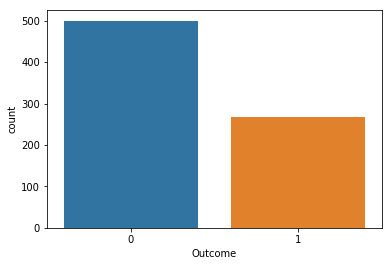

In [7]:
sb.countplot(dataset['Outcome'],label="Count") # to check how many have diabeties and how many not

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

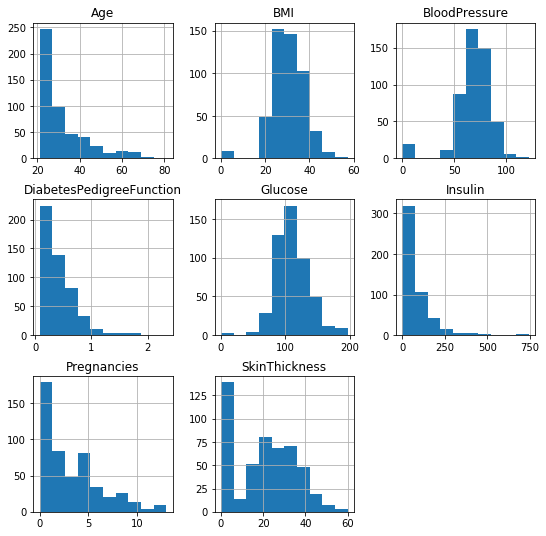

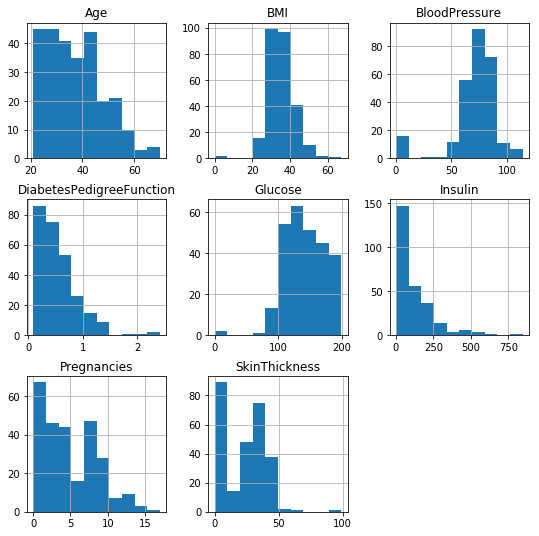

In [8]:
dataset.groupby('Outcome').hist(figsize=(9,9)) # first set gives non-diabetic distribution
# second set gives diabetic  distribution

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataset.loc[:,dataset.columns!='Outcome'], dataset['Outcome'],stratify=dataset['Outcome'], random_state =66)

In [10]:
#Y_test

In [11]:
# records kept for testing
# this is the table with only the test data
pd.concat((X_test,Y_test),axis =1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
506,0,180,90,26,90,36.5,0.314,35,1
709,2,93,64,32,160,38.0,0.674,23,1
257,2,114,68,22,0,28.7,0.092,25,0
518,13,76,60,0,0,32.8,0.180,41,0
432,1,80,74,11,60,30.0,0.527,22,0
84,5,137,108,0,0,48.8,0.227,37,1
153,1,153,82,42,485,40.6,0.687,23,0
668,6,98,58,33,190,34.0,0.430,43,0
96,2,92,62,28,0,31.6,0.130,24,0
256,3,111,56,39,0,30.1,0.557,30,0


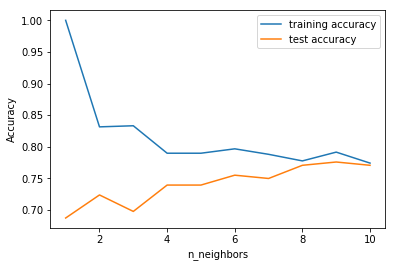

In [12]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy =[]
test_accuracy=[]

# try n_neighbours from 1 to 10
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train , Y_train)
    
    # record training set accuracy
    training_accuracy.append(knn.score(X_train,Y_train))
    
    # record test set accuracy
    test_accuracy.append(knn.score(X_test,Y_test))
    
plt.plot(neighbors_settings,training_accuracy,label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label ="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [13]:
#help(train_test_split)

In [14]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, Y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, Y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.78


In [15]:
knn.predict(X_test)

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

# ROC curve

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [17]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr, color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever Operating Characteristics (ROC) curve')
    plt.legend()
    plt.show()

In [19]:
probs = knn.predict_proba(X_test)
probs

array([[0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.88888889, 0.11111111],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.55555556, 0.44444444],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.88888889, 0.11111111],
       [0.22222222, 0.77777778],
       [1.        , 0.        ],
       [0.55555556, 0.44444444],
       [0.88888889, 0.11111111],
       [0.77777778, 0.22222222],
       [0.11111111, 0.88888889],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.44444444, 0.55555556],
       [0.77777778, 0.22222222],
       [0.55555556, 0.44444444],
       [0.55555556, 0.44444444],
       [0.55555556, 0.44444444],
       [0.77777778, 0.22222222],
       [0.44444444, 0.55555556],
       [0.55555556, 0.44444444],
       [0.88888889, 0.11111111],
       [0.88888889, 0.11111111],
       [0.

In [20]:
probs = probs[:,1]
probs

array([0.66666667, 0.33333333, 0.11111111, 0.        , 0.        ,
       0.66666667, 0.66666667, 0.44444444, 0.        , 0.33333333,
       1.        , 0.11111111, 0.77777778, 0.        , 0.44444444,
       0.11111111, 0.22222222, 0.88888889, 0.66666667, 0.66666667,
       0.55555556, 0.22222222, 0.44444444, 0.44444444, 0.44444444,
       0.22222222, 0.55555556, 0.44444444, 0.11111111, 0.11111111,
       0.22222222, 0.33333333, 0.44444444, 0.11111111, 0.44444444,
       0.44444444, 0.44444444, 0.55555556, 0.77777778, 0.22222222,
       0.77777778, 0.        , 0.22222222, 0.11111111, 0.88888889,
       0.        , 0.        , 0.66666667, 0.22222222, 0.66666667,
       0.44444444, 1.        , 0.        , 0.33333333, 0.88888889,
       0.44444444, 0.55555556, 0.44444444, 0.        , 0.77777778,
       0.33333333, 0.44444444, 0.11111111, 0.22222222, 0.77777778,
       0.        , 0.22222222, 0.44444444, 0.33333333, 0.33333333,
       0.11111111, 0.22222222, 0.22222222, 0.        , 0.33333

In [21]:
auc = roc_auc_score(Y_test,probs)
print('AUC: %.2f' % auc)

AUC: 0.82


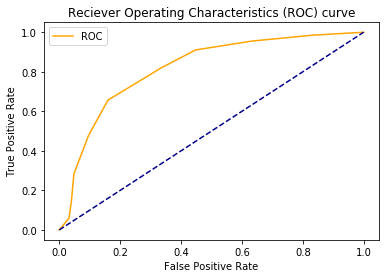

In [22]:
fpr,tpr, threshold = roc_curve(Y_test,probs)
plot_roc_curve(fpr,tpr)